In [1]:
# FFNN implementation in Keras
import numpy as np
from numpy.random import seed
seed(1337)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
from sklearn.datasets import load_digits
data = load_digits(n_class=10)
X = data.data[:,:32]
y = np.zeros((X.shape[0], 10), dtype=np.int32)
for idx, i in enumerate(data.target):
  y[idx,i]=1

# Making a test split :)
X_test = X[:100]
y_test = y[:100]
X = X[100:]
y = y[100:]

X.shape[0]/10

169.7

In [2]:
# define the keras model
model = Sequential()

# Input Layer
# TODO: You can change the number of neurons in the first layer here - leave the input_shape= as is, though :)
# TODO: You can change the activation here too
model.add(Dense(256,
                input_shape=(32,), # DO NOT CHANGE
                activation='sigmoid'))

# Hidden Layer(s)
# TODO: Add some more here!
# EXAMPLE:
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

# Output Layer
model.add(Dense(10, activation='softmax')) # DO NOT CHANGE


# compile the keras model
model.compile(loss='categorical_crossentropy', # DO NOT CHANGE
              optimizer='adam', # sgd, adam, etc...
              metrics=['accuracy']) # DO NOT CHANGE

# fit the keras model on the dataset
history = model.fit(X, y, validation_split = 0.1, epochs=8, batch_size=40, shuffle=True)

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))


c:\Users\nickl\Documents\MI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1312 - loss: 2.3471 - val_accuracy: 0.3412 - val_loss: 2.0611
Epoch 2/8
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4657 - loss: 1.9547 - val_accuracy: 0.5647 - val_loss: 1.6734
Epoch 3/8
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6282 - loss: 1.5735 - val_accuracy: 0.6529 - val_loss: 1.3595
Epoch 4/8
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6983 - loss: 1.2574 - val_accuracy: 0.7765 - val_loss: 1.1063
Epoch 5/8
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7769 - loss: 1.0051 - val_accuracy: 0.8000 - val_loss: 0.9275
Epoch 6/8
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8058 - loss: 0.8379 - val_accuracy: 0.8235 - val_loss: 0.8239
Epoch 7/8
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8503 - loss: 0.6824 - val_accuracy: 0.8294 - val_loss: 0.7287
Epoch 8/8
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8633 - loss: 0.5871 - val_accuracy: 0.8235 - val_loss: 0.6746

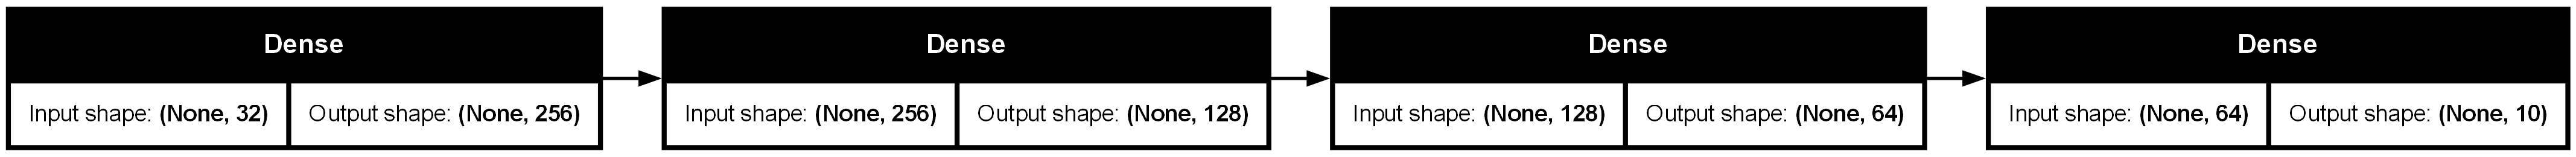

In [7]:


from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model5.png', show_shapes=True, rankdir='LR')


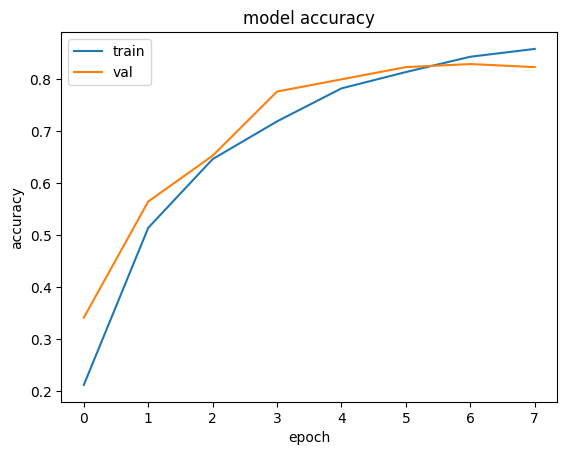

In [6]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()